# Introduction

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

Standard form of machine learning algorithms often need to optimize a cost function given by:
$$Q(w) = \frac{1}{n}\sum_{i=1}^{n}Q_i(w)$$
where the parameter $w$ needs to be estimated that mimimizes $Q(w)$ and each $Q_i(w)$ represents some function of $i^{th}$ training sample.

The basic structure of gradient descent is very simple and intuitive. We have the cost function $Q(w)$ and we want to minimize the cost function by searching for optimal parameter $w$. This is done by finding the gradient of cost function and move the parameter towards the direction of the gradient. The update can be tuned by using a learning rate $\alpha$ which determines the rate at which the optimization happens.
There are broadly two types of gradient descent approaches:
    1. Batch Gradient Descent
    2. Stochastic Gradient Descent

#### Batch Gradient Descent

In this method, basically the gradient descent is done over the complete training set. So, the cost function is differentiated for each of the $i$ training samples and the update is done. The gradient descent equation looks like the following:
$$w = w - \alpha * \nabla Q(w) = w - \alpha * \sum_{i=1}^{n}\nabla\frac{Q_i(w)}{n}$$


#### Stochastic Gradient Descent

Usually for large datasets, batch gradient descent can be pretty slow since it requires gradient update for all the training samples. In stochastic gradient descent, the update is rather done for one training sample at a time. The first step involves randomizing the training samples so that the gradient update is not skewed. The update then occurs as follows:
$$w = w - \alpha * \nabla Q(w) = w - \alpha * \nabla\frac{Q_i(w)}{n}$$
This step is repeated either until a minimum accepted threshold for cost function is reached or for some specified number of times (usually referred to as epochs).

#### Dynamic learning rate

The learning rate is pretty important hyperparameter. If its too low, the convergene would be slower and if its too high, it might lead to recurring overshooting (missing the minima) and the optimization round might actually diverge. So, to avoid that we need to ensure that the gradient is actually decreasing after every round. If its decreasing, we can try to increase the learning rate by 5% and if its increasing (meaning we missed the minima), the learning rate can be reduced by 50%. This will ensure that the algorithm atleast tries to adapt as per the feedback from previous run.

NOTE: Experimentally I've seen that adaptive learning rate doesn't work well for stochastic gradient descent. My hypothesis is that specific samples with high variance when selected, would change the learning rate. And if this happens frequently, this could lead to a lot of variation in the cost optimizations.

#### Least square optimization using Gradient Descent

For least-square optimizations required for linear regressions, the hypothesis function is defined as:
$$h_{w}(x) = w^Tx = \sum_{i=1}^{n}w_ix_i$$
where $x$ is the feture vector and $w$ is the coefficient vector. So, the cost function is defined to be the residual sum of squares:
$$Q(w) = \frac{1}{2m}\sum_{i=1}^{m}(h_{w}(x^{(i)}) - y^{(i)})^2$$
$$\nabla Q(w) = \frac{1}{m}\sum_{i=1}^{m}(h_{w}(x^{(i)}) - y^{(i)})x^{(i)}$$
$$w = w - \alpha * \frac{1}{m}\sum_{i=1}^{m}(h_{w}(x^{(i)}) - y^{(i)})x^{(i)}$$
In case of stochastic gradient descent, we do the update for one sample at a time:
$$w = w - \alpha * (h_{w}(x^{(i)}) - y^{(i)})x^{(i)}$$

Using vectored approach, $X$ is the feature matrix with a row $X^{(i)}$ denoting one training sample. $Y$ is the response vector with response $Y^{(i)}$ for $i^{th}$ training sample. $m$ is the total number of training samples. $W$ is the coefficient vector we update. So, the update would be,
$$W = W - \alpha * \frac{1}{m}\sum_{i=1}^{m}(XW - Y)^{(i)}\cdot(X^{(i)})^T$$
For stochastic case, it'd be:
$$W = W - \alpha * (X^{(i)}W - Y^{(i)})\cdot(X^{(i)})^T$$
where $i$ is selected randomly from the $m$ samples.

#### Log loss optimization using Gradient Descent

The gradient function used for log loss optimization (ususally used for <a href="https://github.com/soumyasanyal/machinelearning/blob/master/Regression/Logistic%20Regression.ipynb">Logistic Regression)</a>:
$$J(w) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_w(x^{(i)})) + (1 - y^{(i)})log(1 - h_w(x^{(i)}))]$$
where $h_w(x)$ is the sigmoid function:
$$h_w(x) = \frac{1}{1 + e^{-w^Tx}}$$
The gradient of the cost function comes out to be:
$$\nabla J(w) = \frac{1}{m}\sum_{i=1}^{m}[h_w(x^{(i)}) - y^{(i)}]x^{(i)}$$
So, the final update function comes out to be the same, with the only difference that the hypothesis function is sigmoid rather than a linear function.

<b>To test the logloss cost function, we need to simulate data for logistic regression. We'll do this in another post specific to Logistic Regression.</b>

#### Hinge loss optimization using Gradient Descent

The gradient function used for hinge loss optimization (usually used for <a href="https://github.com/soumyasanyal/machinelearning/blob/master/Regression/Support%20Vector%20Machines.ipynb">Support Vector Machines</a>):
$$J(w) = \frac{1}{N}\sum_{i=1}^{N}\big(\frac{\lambda}{2}w^Tw + max(0, 1 - y^{(i)}h_w(x^{(i)}))\big)$$
where the SVM hyperplane is given by $h_w(x) = w^Tx + b$ ($b$ can be consumed inside $x$ by prepending with 1 in the columns) and $\lambda$ is the regularization coefficient.
Since the gradient of the cost function is dependent on the sample (max function involved), we can only do Stochastic update of the coefficients. The gradient of the cost function comes out to be:
$$\nabla J(w) = \lambda w - y^{(i)}x^{(i)} \quad \textrm{if} \quad y^{(i)}h_w(x^{(i)}) < 1 \\ \lambda w \quad \textrm{otherwise}$$
In this case the update is quite defferent than the other two cases above and we need to define the gradient differently.

<b>To test the hingeloss cost function, we need to simulate data for SVM. We'll do this in another post specific to Support Vector Machines.</b>

# Gradient Descent in python

We implement both the varients of gradient descent discussed above. Also, we'll need to implement some plotting functionality to see how the gradient descent does for both cases. The main class should take the type of descent to apply, the kind of loss function to use, the learning rate and the epochs. It'll then fit the training samples to get the desired coefficients.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class GradientDescent:
    
    #method: batch or stochastic.
    #loss: the loss function -> ols (ordinary least squares), logloss (for Logistic Regressions),
    #      hingeloss (for SVM, stochastic only)
    #lr: the learning rate, alpha
    #epochs: the number of iterations
    #adaptive: use adaptive learning rate
    #lambdaVal: the regularization factor (currently defined only for SVM)
    def __init__(self, method="batch", loss="ols", lr=0.001, epochs=1000, adaptive=False, lambdaVal=0):
        self.coeff = None
        self.method = method
        self.loss = loss
        self.lr = lr
        self.epochs = epochs
        self.adaptive = adaptive
        self.lambdaVal = 0
    
    def __OLS(self, Y, YPredict):
        return sum((YPredict - Y)**2)/(2*len(Y))
    
    def __logLoss(self, Y, YPredict):
        return sum((-1.0/len(Y)) * (Y * np.log(YPredict) + (1 - Y) * np.log(1 - YPredict)))
    
    def __hingeLoss(self, Y, YPredict):
        #Here self.coeff contains the constant b as well in equation of hyperplane ( f(x) = w.x + b )
        return (1.0/len(Y)) * sum(self.lambdaVal/2.0 * sum(self.coeff * self.coeff)
                                   + np.maximum(0, 1 - Y * YPredict))

    def __costVal(self, Y, YPredict):
        if self.loss == 'ols':
            return self.__OLS(Y, YPredict)
        elif self.loss == 'logloss':
            return self.__logLoss(Y, YPredict)
        elif self.loss == 'hingeloss':
            return self.__hingeLoss(Y, YPredict)
    
    def __sigmoid(self, X):
        return 1.0/(1 + np.exp(-X))
    
    def predict(self, X):
        if self.loss == 'ols':
            return np.matmul(X, self.coeff)
        elif self.loss == 'logloss':
            return self.__sigmoid(np.matmul(X, self.coeff))
        elif self.loss == 'hingeloss':
            return np.sign(np.matmul(X, self.coeff))

    def __mean(self, X):
        return sum(X) / float(len(X))
    
    def __squareSum(self, X, Y):
        return sum((X - Y)**2)
    
    def score(self, YTest, YPredict):
        return 1 - self.__squareSum(YTest, YPredict) / self.__squareSum(YTest, self.__mean(YTest))
    
    def __plotLoss(self, costValues):
        plt.plot(costValues)
        plt.ylabel('Loss function value')
        plt.xlabel('Epochs')
        plt.show()
    
    #method=batch
    def __batch(self, X, Y):
        costValues = []
        prevGradient = float("inf")
        for epoch in range(self.epochs):
            YPredict = self.predict(X)
            costVal = self.__costVal(Y, YPredict)
            gradient = ((YPredict - Y).reshape(-1,1)*X).sum(axis=0).reshape(-1,1) / len(Y)
            if(self.adaptive):
                #Check if current gradient is smaller than previous gradient.
                if(np.sum(np.absolute(gradient)) <= prevGradient):
                    self.lr *= 1.05
                    self.coeff = self.coeff - self.lr * gradient
                else:
                    #just reduce the learning rate and skip any update
                    self.lr *= 0.5
                prevGradient = np.sum(np.absolute(gradient))
            else:
                self.coeff = self.coeff - self.lr * gradient
            costValues.append(costVal)
#             print('>epoch=%d, lrate=%.6f, error=%.3f' % (epoch, self.lr, ols))
        self.__plotLoss(costValues)
        return self.coeff
    
    #method=stochastic
    def __stochastic(self, X, Y):
        costValues = []
        prevGradient = float("inf")
        for epoch in range(self.epochs):
            #The index which is used for gradient update
            sampleIndex = random.randint(0, len(Y)-1)
            XSample = X[sampleIndex,:]
            YSample = Y[sampleIndex,:]
            YPredict = self.predict(XSample)
            costVal = self.__costVal(YSample, YPredict)
            if self.loss == 'hingeloss':
                # there are two parts of the gradient update.
                if YSample*YPredict < 1:
                    gradient = self.lambdaVal*self.coeff - YSample*XSample.reshape(-1,1)
                else:
                    gradient = self.lambdaVal*self.coeff
            else:
                gradient = ((YPredict - YSample)*XSample).reshape(-1,1)
            if(self.adaptive):
                #Check if current gradient is smaller than previous gradient.
                if(np.sum(np.absolute(gradient)) <= prevGradient):
                    self.lr *= 1.05
                    self.coeff = self.coeff - self.lr * gradient
                else:
                    #just reduce the learning rate and skip any update
                    self.lr *= 0.5
                prevGradient = np.sum(np.absolute(gradient))
            else:
                self.coeff = self.coeff - self.lr * gradient
            costValues.append(costVal)
#             print('>epoch=%d, lrate=%f, error=%.3f' % (epoch, self.lr, ols))
        self.__plotLoss(costValues)
        return self.coeff
    
    #X is the feature matrix (prepended with 1) and Y is the response vector
    def fit(self, X, Y):
        Num_features = len(X[0,:])
        self.coeff = np.random.rand(Num_features, 1)
        if self.method == 'batch':
            if self.loss == 'hingeloss':
                return "Hinge Loss not defined for batch updates! Use stochastic updates."
            else:
                return self.__batch(X, Y)
        elif self.method == 'stochastic':
            return self.__stochastic(X, Y)

Sample function which is being predicted: y = 3 +4*x1 + 7*x2


Gradient descent: batch with no adaptive learning


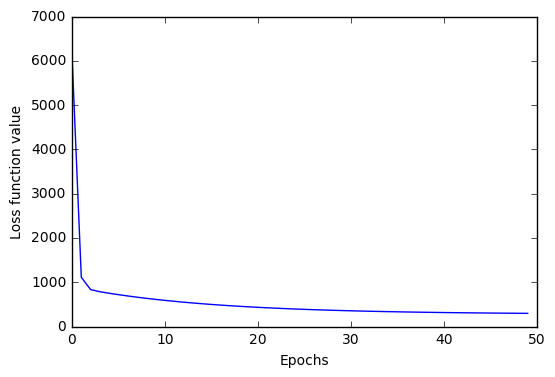

Optimized Coefficients: [[ 1.01919267]
 [ 3.98924624]
 [ 5.71413078]]
R squared score:  [ 0.95772905]


Gradient descent: batch with high learning rate and no adaptive learning


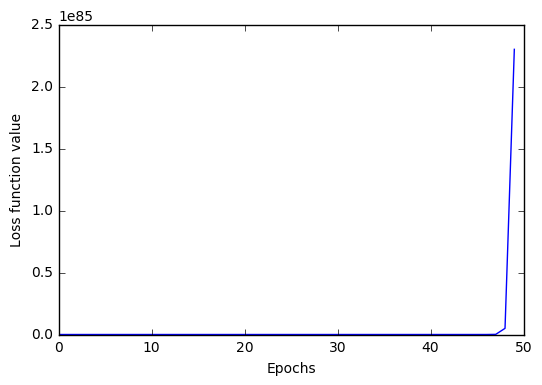

Optimized Coefficients: [[  1.97865770e+39]
 [ -1.65281857e+42]
 [  4.47633836e+39]]
R squared score:  [ -1.43912847e+83]


Gradient descent: batch with high learning rate and adaptive learning


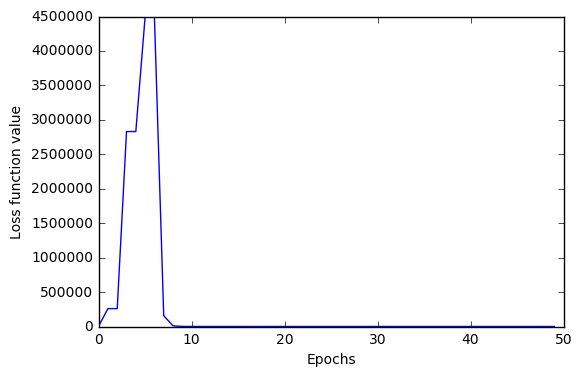

Optimized Coefficients: [[ 0.58667664]
 [ 3.99374184]
 [ 6.72580909]]
R squared score:  [ 0.96165647]


In [2]:
import random

def randomSampleGenerator(n):
    Y = []
    X = []
    random.seed(10)
    for i in range(1,n+1):
        x1 = random.uniform(-50, 50)
        x2 = random.uniform(-10, 10)
        var = random.random() * 50 * random.randint(-1, 1)
        y = (3 + 4 * x1 + 7 * x2) + var
        Y.append([y])
        X.append([1, x1, x2])
    return [np.array(X), np.array(Y)]

if __name__ == "__main__":
    N_samples = 1000
    [X, Y] = randomSampleGenerator(N_samples)
    print('Sample function which is being predicted: y = 3 +4*x1 + 7*x2')
    [X_train, Y_train ] = [X[0:int(0.7*N_samples),:], Y[0:int(0.7*N_samples)]]
    [X_test, Y_test ] = [X[int(0.7*N_samples):N_samples,:], Y[int(0.7*N_samples):N_samples]]

    GD = GradientDescent(epochs=50, lr=0.001)
    print('\n\nGradient descent: batch with no adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))

    GD = GradientDescent(epochs=50, lr=0.01)
    print('\n\nGradient descent: batch with high learning rate and no adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))

    GD = GradientDescent(epochs=50, lr=0.01, adaptive=True)
    print('\n\nGradient descent: batch with high learning rate and adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))

Sample function which is being predicted: y = 3 +4*x1 + 7*x2


Gradient descent: stochastic with no adaptive learning


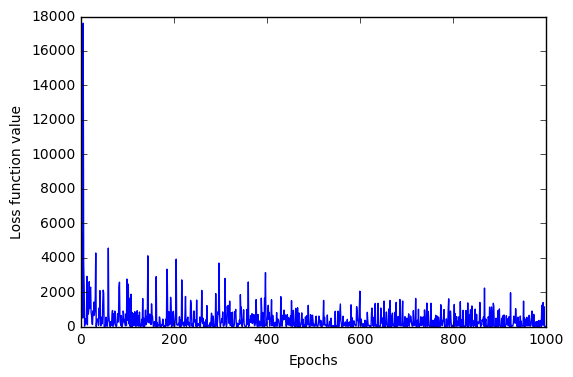

Optimized Coefficients: [[ 0.7932205 ]
 [ 4.0915509 ]
 [ 6.66101698]]
R squared score:  [ 0.96105641]


Gradient descent: stochastic with adaptive learning


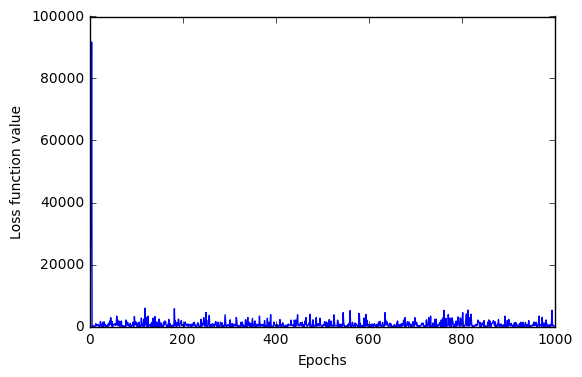

Optimized Coefficients: [[-0.82016585]
 [ 4.93716747]
 [ 8.92009823]]
R squared score:  [ 0.9053779]


In [3]:
    N_samples = 1000
    [X, Y] = randomSampleGenerator(N_samples)
    print('Sample function which is being predicted: y = 3 +4*x1 + 7*x2')
    [X_train, Y_train ] = [X[0:int(0.7*N_samples),:], Y[0:int(0.7*N_samples)]]
    [X_test, Y_test ] = [X[int(0.7*N_samples):N_samples,:], Y[int(0.7*N_samples):N_samples]]

    GD = GradientDescent(method='stochastic', epochs=1000, lr=0.0001)
    print('\n\nGradient descent: stochastic with no adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))

    GD = GradientDescent(method='stochastic', epochs=1000, lr=0.01, adaptive=True)
    print('\n\nGradient descent: stochastic with adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))